## Introduction
The project is about finding the most popular content category for a social media company called "Social Buzz".
I will be using three datasets to achieve this objective. The datasets are:
* Content
* Reaction
* ReactionTypes
More details on the datasets:
### Content
ID: Unique ID of the content that was uploaded (automatically generated)

User ID: Unique ID of a user that exists in the User table

Type: A string detailing the type of content that was uploaded

Category: A string detailing the category that this content is relevant to

URL: Link to the location where this content is stored

### Reaction
Content ID: Unique ID of a piece of content that was uploaded

User ID: Unique ID of a user that exists in the User table who reacted to this piece of content

Type: A string detailing the type of reaction this user gave

Datetime: The date and time of this reaction

### ReactionTypes
Type: A string detailing the type of reaction this user gave

Sentiment: A string detailing whether this type of reaction is considered as positive, negative or neutral

Score: This is a number calculated by Social Buzz that quantifies how “popular” each reaction is. A reaction type with a higher score
should be considered as a more popular reaction.

#### Import libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

import math

## Data Wrangling

### Data Gathering  

In [74]:
#import datasets
df1 = pd.read_csv('Content.csv',index_col=0)
df2 = pd.read_csv('Reactions.csv',index_col=0)
df3 = pd.read_csv('ReactionTypes.csv',index_col=0)

### Assessing Data

### Visual Assessment

#### Content dataset (df1)

In [75]:
#show all rows and columns from dataset
df1

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


#### Reactions dataset (df2)

In [76]:
df2

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


#### Reaction Types dataset (df3)

In [77]:
df3

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


### Programmatic Assessment

#### Content dataset (df1)

In [78]:
#list first 5 rows
df1.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [79]:
#check the number of rows, columns, datatypes and missing data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [80]:
#check basic statistics
df1.describe()

,Content ID,User ID,Type,Category,URL
count,1000,1000,1000,1000,801
unique,1000,446,4,41,801
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology,https://socialbuzz.cdn.com/content/storage/975...
freq,1,8,261,71,1


In [81]:
#check for null values
df1.isna().sum()

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [82]:
#check for duplicates
df1.duplicated().sum()

0

In [83]:
#check for duplicates in User ID
df1["User ID"].duplicated().sum()

554

In [84]:
#check the unique values in Type
df1.Type.unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [85]:
#check the unique values in Type
df1.Category.unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [89]:
#see the format of the values
df1.Category.value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

#### Reactions dataset (df2)

In [90]:
#list first 5 rows
df2.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [91]:
#check the number of rows, columns, datatypes and missing data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [92]:
#check basic statistics
df2.describe()

,Content ID,User ID,Type,Datetime
count,25553,22534,24573,25553
unique,980,500,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,c76c3393-88e2-47b0-ac37-dc4f2053f5a5,heart,2020-10-29 20:51:08
freq,49,65,1622,2


In [93]:
#check for null values
df2.isna().sum()

Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [94]:
#check for duplicates
df2.duplicated().sum()

0

In [95]:
#check for duplicates in User ID
df2["User ID"].duplicated().sum()

25052

In [96]:
#check the unique values in Type
df2.Type.unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

#### Reaction Types dataset (df3)

In [97]:
#list first 5 rows
df3.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [98]:
#check the number of rows, columns, datatypes and missing data
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [99]:
#check basic statistics
df3.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


In [100]:
#check for null values
df3.isna().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [101]:
#check for duplicates
df3.duplicated().sum()

0

In [102]:
#check the unique values in Type
df3.Type.unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [103]:
#check the unique values in Sentiment
df3.Sentiment.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [104]:
#check the unique values in Score
df3.Score.unique()

array([60, 70,  0,  5, 30, 20, 65, 75, 72, 50, 10, 45, 35, 15, 12],
      dtype=int64)

### Quality issues
#### Content dataset (df1)

* Content ID and User ID column names are not convenient to use
* Type column name is not appropriate
* Missing data is present in URL
* Category column contains different format of values

#### Reactions dataset (df2)

* Content ID and User ID column names are not convenient to use
* Datetime column datatype is string which should not be
* Missing data is present in User ID
* Missing data is present in Type

### Tidiness issues

* The first two tables and the Score column from the third dataset are not merged together

### Cleaning

### Quality Issues

In [105]:
#make a copy of the 3 dataset before cleaning
#rename `Content ID` to ContendID
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

#### Content dataset (df1)

#### Define
I will rename `Content ID` to `ContendID`, and `User ID` to `UserID`

#### Code

In [106]:
#rename Content ID to ContendID
df1.rename(columns={'Content ID':'ContentID','User ID':'UserID'}, inplace=True)

#### Test

In [107]:
#list the column names
df1.columns

Index(['ContentID', 'UserID', 'Type', 'Category', 'URL'], dtype='object')

#### Define
I will rename `Type` to `ContendType`

#### Code

In [108]:
#rename Content ID to ContendID
df1.rename(columns={'Type':'ContentType'}, inplace=True)

#### Test

In [109]:
#list the column names
df1.columns

Index(['ContentID', 'UserID', 'ContentType', 'Category', 'URL'], dtype='object')

#### Define
I will drop rows that has no URL

#### Code

In [110]:
#drop rows that has no URL
df1.dropna(inplace=True)

#### Test

In [111]:
#see if missing values exist
df1.isna().sum()

ContentID      0
UserID         0
ContentType    0
Category       0
URL            0
dtype: int64

#### Define
Values in the `Category` column will be standardized by stripping out the quotes and converting all to lower case

#### Code

In [113]:
#strip off the quotes that are present in some
df1.Category = df1.Category.str.strip('""')
#turn the values to all lower case
df1.Category = df1.Category.str.lower()

#### Test

In [114]:
#see if the values are in the same format
df1.Category.value_counts()

travel             60
science            55
technology         54
animals            54
fitness            54
culture            54
tennis             53
cooking            51
healthy eating     50
dogs               49
education          48
food               47
soccer             47
veganism           43
studying           42
public speaking    40
Name: Category, dtype: int64

#### Reactions dataset (df2)

#### Define
I will rename `Content ID` to `ContendID`, and `User ID` to `UserID`

#### Code

In [36]:
#rename Content ID to ContendID
df2.rename(columns={'Content ID':'ContentID','User ID':'UserID'}, inplace=True)

#### Test

In [37]:
#list the column names
df2.columns

Index(['ContentID', 'UserID', 'Type', 'Datetime'], dtype='object')

#### Define
I will change `datetime` datatype to `datetime` datatype

#### Code

In [38]:
#change datetime datatype to datetime
df2.Datetime = pd.to_datetime(df2.Datetime)

#### Test

In [39]:
#see the datatype of the columns
df2.dtypes

ContentID            object
UserID               object
Type                 object
Datetime     datetime64[ns]
dtype: object

#### Define
I will drop rows that has missing values. I have no reason to impute missing values

#### Code

In [40]:
#drop rows that has no URL
df2.dropna(inplace=True)

#### Test

In [41]:
#see if missing values exist
df2.isna().sum()

ContentID    0
UserID       0
Type         0
Datetime     0
dtype: int64

#### Reaction Types dataset (df3)

### Tidiness Issues

#### Define
I will merge df1 and df2 on `ContentID` and also add a Score column from df3 to the merged dataset

#### Code

In [42]:
#merge df1 and df2 on ContentID
df_master = pd.merge(df1, df2, on=['ContentID'])

In [43]:
#make a function that returns the score for a reaction type, using df3
def score(reaction):
    reaction_types = list(df3.Type)
    if reaction in reaction_types:
        return (df3.loc[df3.Type == reaction].Score[reaction_types.index(reaction)])
    else:
        raise ValueError("wrong type")

In [44]:
#create Score column in df_master to keep track of the score for each reaction
df_master['Score'] = df_master.Type.apply(score)

#### Test

In [45]:
#see the datatype of the columns
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18384 entries, 0 to 18383
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ContentID    18384 non-null  object        
 1   UserID_x     18384 non-null  object        
 2   ContentType  18384 non-null  object        
 3   Category     18384 non-null  object        
 4   URL          18384 non-null  object        
 5   UserID_y     18384 non-null  object        
 6   Type         18384 non-null  object        
 7   Datetime     18384 non-null  datetime64[ns]
 8   Score        18384 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.4+ MB


In [72]:
#convert dataframe to csv
df_master.to_csv('accenture_master.csv')

### Visualization

### Dataset structure
The master dataset that I will be using has 18,384 rows and 9 columns. Most of the features datatypes are object(strings) while only two are int and datetime datatype.

### Main feature(s) of interest in your dataset
My main feature of interest is Category. I want to know the most popular category on `SocialBuzz`

### Features in the dataset that will help support my investigation into the feature(s) of interest
I would like to use Type and Score to help me in finding the most popular content categories on `SocialBuzz`

### Univariate Exploration¶
I will begin my exploration with Category, my main feature of interest

#### Distribution of Category

In [46]:
#see the overview of values in Category
df_master.Category.value_counts()

travel             1368
science            1351
animals            1323
healthy eating     1303
cooking            1277
culture            1217
food               1183
tennis             1153
technology         1150
education          1127
soccer             1065
fitness            1050
dogs               1047
veganism            948
public speaking     911
studying            870
Studying             41
Name: Category, dtype: int64

In [47]:
#clean up the data more by replacing Studying category with studying
df_master.Category = df_master.Category.str.lower()

In [48]:
#confirm that `studying` category is in only 1 format
df_master.Category.value_counts()

travel             1368
science            1351
animals            1323
healthy eating     1303
cooking            1277
culture            1217
food               1183
tennis             1153
technology         1150
education          1127
soccer             1065
fitness            1050
dogs               1047
veganism            948
studying            911
public speaking     911
Name: Category, dtype: int64

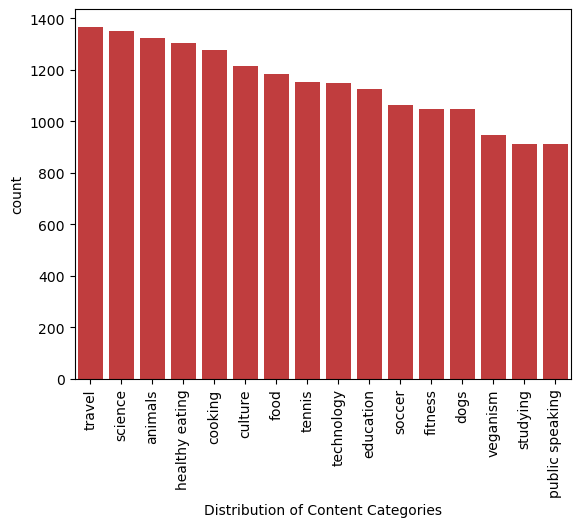

In [49]:
#get the content categories frequency and their indices
base_color = sb.color_palette()[3]
freq = df_master.Category.value_counts()
content_category_order = freq.index
#plot the bar chart of content categories in decreasing order of frequency
sb.countplot(data=df_master, x='Category', color=base_color, order=content_category_order);
plt.xticks(rotation = 90);
plt.xlabel('Distribution of Content Categories');

In the above plot, travel category is the most posted content category, followed by science. The least posted content category is Studying.

In [50]:
df_master[df_master.Category == 'studying']

,ContentID,UserID_x,ContentType,Category,URL,UserID_y,Type,Datetime,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,30
...,...,...,...,...,...,...,...,...,...
18035,26c02731-b5d8-4ad3-99a2-5e589e107937,1d8dfb6a-330c-4eb9-a603-364f207c6e57,video,studying,https://socialbuzz.cdn.com/content/storage/26c...,3d13e0d3-e765-4065-9221-3f864689b9e0,super love,2021-05-10 21:55:56,75
18036,26c02731-b5d8-4ad3-99a2-5e589e107937,1d8dfb6a-330c-4eb9-a603-364f207c6e57,video,studying,https://socialbuzz.cdn.com/content/storage/26c...,cb97b0ea-fc93-4597-b391-846710c6fedc,cherish,2021-04-25 18:57:59,70
18037,26c02731-b5d8-4ad3-99a2-5e589e107937,1d8dfb6a-330c-4eb9-a603-364f207c6e57,video,studying,https://socialbuzz.cdn.com/content/storage/26c...,d3aa94aa-3e81-49e4-915a-d269e4f42f29,cherish,2020-12-05 17:38:16,70
18038,26c02731-b5d8-4ad3-99a2-5e589e107937,1d8dfb6a-330c-4eb9-a603-364f207c6e57,video,studying,https://socialbuzz.cdn.com/content/storage/26c...,a8d09ab9-44c6-493c-afdf-93888822a4b0,love,2020-07-19 11:39:33,65


In [51]:
df_master.groupby('Category').Score.sum()

Category
animals            52443
cooking            49681
culture            47710
dogs               41816
education          45103
fitness            41829
food               47576
healthy eating     52745
public speaking    37730
science            53657
soccer             42031
studying           35861
technology         46683
tennis             43612
travel             53935
veganism           38513
Name: Score, dtype: int64

#### Distribution of Type

Next, I will explore the distribution of `Type` variable

In [52]:
#see the overview of values in Type
df_master.Type.value_counts()

heart          1225
scared         1174
interested     1169
indifferent    1167
super love     1167
love           1165
peeking        1157
want           1154
hate           1153
adore          1148
disgust        1142
like           1132
cherish        1119
worried        1112
dislike        1109
intrigued      1091
Name: Type, dtype: int64

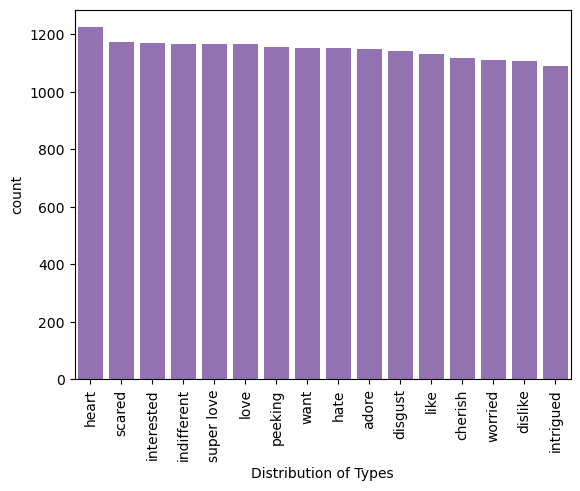

In [53]:
#get the Type categories frequency and their indices
base_color = sb.color_palette()[4]
freq = df_master.Type.value_counts()
type_category_order = freq.index
#plot the bar chart of Type categories in decreasing order of frequency
sb.countplot(data=df_master, x='Type', color=base_color, order=type_category_order);
plt.xticks(rotation = 90);
plt.xlabel('Distribution of Types');

The plot above reveals that we have little difference in the frequency of each type as evidenced by the close height of the bars. Interestingly, `heart` type is the most used and `intrigued` type is the least used.

#### Distribution of Score

I will now explore the distribution of the `Score` variable

In [54]:
#display basic statistics of the variable
df_master.Score.describe()

count    18384.000000
mean        39.758758
std         26.039051
min          0.000000
25%         15.000000
50%         45.000000
75%         65.000000
max         75.000000
Name: Score, dtype: float64

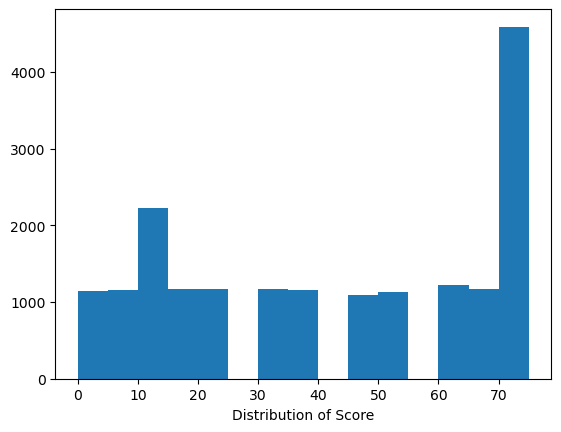

In [55]:
#plot the histogram distribution of Score
bins = np.arange(0, df_master.Score.max()+5, 5)
plt.hist(data = df_master, x = 'Score', bins = bins);
plt.xlabel('Distribution of Score');

Since the Score variable is not continuous, there are gaps in the distribution of the dataset. The distribution has two peaks (bimodal)

### Distribution of the variable of interest
Since the `Category` variable is a qualitative one, the bar chart shows that `travel` category is the most posted content category, followed by `science`. The least posted content category is `studying` and `public speaking`. I further cleaned up the `Category` column in order to standardized the values used.

### Distribution of the supporting variables


The bar chart plot for the `Type` variable reveals that we have little difference in the frequency of each type as evidenced by the close height of the bars. Interestingly, heart type is the most used and intrigued type is the least used.

Since the `Score` variable is not continuous, there are gaps in the distribution of the dataset as shown on the histogram. The distribution has two peaks (bimodal)

## Bivariate Exploration
To continue my research, I will now look at the relationships between my variable of interest (`Category`) and other supporting variables (`Type` and `Score`)

#### `Category` Vs. `Type`
I will now investigate the relationship between the `Category` variable and the `Type` variable. To obtain a significant insight, I will sum up the frequency of the reactions for each category and plot against each category.

In [56]:
# Use group_by() and size() to classify the dataset based on Category and Type to obtain pandas Series
ct_counts = df_master.groupby(['Category', 'Type']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,Category,Type,count
0,animals,adore,78
1,animals,cherish,84
2,animals,disgust,80
3,animals,dislike,72
4,animals,hate,91
...,...,...,...
251,veganism,peeking,69
252,veganism,scared,66
253,veganism,super love,60
254,veganism,want,59


In [57]:
# Use DataFrame.pivot() to rearrange the data, to have Category on rows
ct_counts = ct_counts.pivot(index = 'Category', columns = 'Type', values = 'count')
ct_counts

Type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried
Category,,,,,,,,,,,,,,,,
animals,78,84,80,72,91,84,75,77,83,69,84,92,94,87,87,86
cooking,79,67,88,77,82,89,67,103,56,82,75,85,94,91,68,74
culture,66,80,74,74,79,67,86,73,67,75,81,76,77,76,82,84
dogs,65,55,67,59,70,83,71,70,54,74,59,69,72,70,66,43
education,66,68,55,68,76,72,75,72,76,73,79,73,64,73,64,73
fitness,68,63,74,76,58,66,64,55,58,87,68,57,72,76,54,54
food,63,86,74,68,83,79,67,72,70,63,89,77,75,72,80,65
healthy eating,87,87,74,78,88,87,83,79,83,85,76,80,80,84,84,68
public speaking,68,47,51,57,46,58,54,55,66,54,67,47,55,65,64,57


In [58]:
#get sum of all the reaction types
index = ct_counts.index
cols = ct_counts.columns
#sum up all the reaction frequency for each category
def sumup(index,cols):
    count = 0
    row = []#store the total frequency for each Category
    for ind in index:
        for col in cols:
            if not math.isnan(ct_counts.loc[ind,col]):
                if type(int(ct_counts.loc[ind,col])) == int:#locate the value
                    count += ct_counts.loc[ind,col]
                    #print(count)
        row.append(count)
        count = 0
    return row
#create a new column for the total frequency of reactions for each category
ct_counts['total'] = sumup(index,cols)
ct_counts

Type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried,total
Category,,,,,,,,,,,,,,,,,
animals,78,84,80,72,91,84,75,77,83,69,84,92,94,87,87,86,1323
cooking,79,67,88,77,82,89,67,103,56,82,75,85,94,91,68,74,1277
culture,66,80,74,74,79,67,86,73,67,75,81,76,77,76,82,84,1217
dogs,65,55,67,59,70,83,71,70,54,74,59,69,72,70,66,43,1047
education,66,68,55,68,76,72,75,72,76,73,79,73,64,73,64,73,1127
fitness,68,63,74,76,58,66,64,55,58,87,68,57,72,76,54,54,1050
food,63,86,74,68,83,79,67,72,70,63,89,77,75,72,80,65,1183
healthy eating,87,87,74,78,88,87,83,79,83,85,76,80,80,84,84,68,1303
public speaking,68,47,51,57,46,58,54,55,66,54,67,47,55,65,64,57,911


In [59]:
#create a new dataframe by extracting the total column
ct_counts_2 = ct_counts[['total']].copy()

In [60]:
#show the values in the new dataframe
ct_counts_2

Type,total
Category,
animals,1323
cooking,1277
culture,1217
dogs,1047
education,1127
fitness,1050
food,1183
healthy eating,1303
public speaking,911


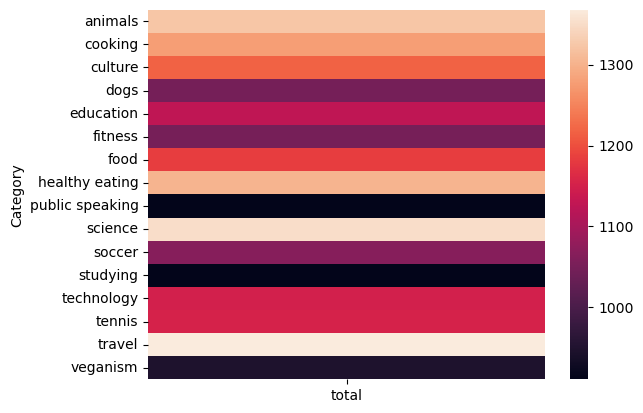

In [61]:
#plot the heatmap using the new dataframe to show the relationship between the categories and the total reactions type for each category
sb.heatmap(ct_counts_2);
plt.xlabel('');

The plot above reveals that `travel`, `science`, and `animals` category have the most number of reactions, while `studying` and `public speaking` have the least number of reactions.

#### `Category` Vs. `Score`
Continuing my analysis, I will now study the relationship between the `Category` variable and the `Score` variable. I will sum up the total reaction scores for each category and plot it against each category.

In [62]:
# Use group_by() and size() to classify the dataset based on Category and Score to obtain pandas Series
gp_counts = df_master.groupby(['Category', 'Score']).size()
gp_counts
#Use Series.reset_index() to convert a series into a dataframe object
gp_counts = gp_counts.reset_index(name='count')
#drop count column because it is not needed
#gp_counts.drop(columns='count',inplace=True)
gp_counts

,Category,Score,count
0,animals,0,80
1,animals,5,91
2,animals,10,72
3,animals,12,86
4,animals,15,94
...,...,...,...
235,veganism,60,77
236,veganism,65,57
237,veganism,70,121
238,veganism,72,61


In [63]:
# Use DataFrame.pivot() to rearrange the data, to have Category on rows
gp_counts = gp_counts.pivot(index = 'Category', columns = 'Score', values = 'count')

In [64]:
#see the data
gp_counts

Score,0,5,10,12,15,20,30,35,45,50,60,65,70,72,75
Category,,,,,,,,,,,,,,,
animals,80,91,72,86,94,75,77,92,83,69,84,84,171,78,87
cooking,88,82,77,74,94,67,103,85,56,82,89,75,135,79,91
culture,74,79,74,84,77,86,73,76,67,75,67,81,162,66,76
dogs,67,70,59,43,72,71,70,69,54,74,83,59,121,65,70
education,55,76,68,73,64,75,72,73,76,73,72,79,132,66,73
fitness,74,58,76,54,72,64,55,57,58,87,66,68,117,68,76
food,74,83,68,65,75,67,72,77,70,63,79,89,166,63,72
healthy eating,74,88,78,68,80,83,79,80,83,85,87,76,171,87,84
public speaking,51,46,57,57,55,54,55,47,66,54,58,67,111,68,65


In [65]:
#get the indexex and columns in lists
gp_index = list(gp_counts.index)
gp_columns = list(gp_counts.columns)
gp_columns

[0, 5, 10, 12, 15, 20, 30, 35, 45, 50, 60, 65, 70, 72, 75]

In [66]:
#sum up all the scores received by each category
def sumup_cat(index,cols):
    count = 0
    row = []#store the total frequency for each Category
    for ind in index:
        for col in cols:
            if not math.isnan(gp_counts.loc[ind,col]):
                if type(int(gp_counts.loc[ind,col])) == int:#locate the value
                    count += int(col) * gp_counts.loc[ind,col]
                    #print(count)
        row.append(count)
        count = 0
    return row

gp_counts['total'] = sumup_cat(gp_index,gp_columns)
gp_counts

Score,0,5,10,12,15,20,30,35,45,50,60,65,70,72,75,total
Category,,,,,,,,,,,,,,,,
animals,80,91,72,86,94,75,77,92,83,69,84,84,171,78,87,52443
cooking,88,82,77,74,94,67,103,85,56,82,89,75,135,79,91,49681
culture,74,79,74,84,77,86,73,76,67,75,67,81,162,66,76,47710
dogs,67,70,59,43,72,71,70,69,54,74,83,59,121,65,70,41816
education,55,76,68,73,64,75,72,73,76,73,72,79,132,66,73,45103
fitness,74,58,76,54,72,64,55,57,58,87,66,68,117,68,76,41829
food,74,83,68,65,75,67,72,77,70,63,79,89,166,63,72,47576
healthy eating,74,88,78,68,80,83,79,80,83,85,87,76,171,87,84,52745
public speaking,51,46,57,57,55,54,55,47,66,54,58,67,111,68,65,37730


In [67]:
#create a new dataframe by extracting the total column
gp_counts_2 = gp_counts[['total']].copy()

In [68]:
#sort the values in the new dataframe by total
gp_counts_2.sort_values(by = ['total'], ascending = False, inplace=True)
gp_counts_2

Score,total
Category,
travel,53935
science,53657
healthy eating,52745
animals,52443
cooking,49681
culture,47710
food,47576
technology,46683
education,45103


In [69]:
#reset index to tuen Category into a column
gp_counts_2 = gp_counts_2.reset_index()

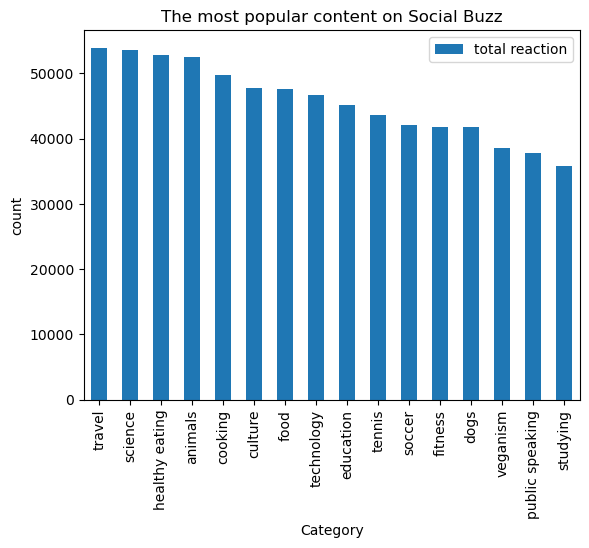

In [70]:
gp_counts_2.plot.bar(x = 'Category', y = 'total');
plt.title('The most popular content on Social Buzz');
plt.ylabel('count');
plt.legend(['total reaction']);

The plot reveals that the top five content categories are: `travel`, `science`, `healthy eating`, `animals`, and `cooking`, while the lowesr content categories are: `public speaking` and `studying`.

There is no need to further the exploration because all the needed information has been deduced.

## The most popular content on Social Buzz
 The most popular content categories for "Social Buzz" are: `travel`, `science`, `healthy eating`, `animals`, and `cooking`